<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/ecuacion_de_onda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ECUACIÓN DE ONDA
# Ecuación de Onda con condición inicial triangular

Resolvemos el siguiente problema de condiciones iniciales y de frontera para la **ecuación de onda**:

$
\frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2}, \quad 0 < x < 1,\ t > 0
$
Condiciones de frontera:
$
u(0,t) = 0,\quad u(1,t) = 0
$

Condiciones iniciales:
$
u(x,0) = f(x) =
\begin{cases}
2x,\quad &0 \le x < 0.5 \\\\
2(1 - x),\quad &0.5 \le x \le 1
\end{cases}, \quad
\frac{\partial u}{\partial t}(x,0) = 0
$

Usaremos **SymPy** para construir la solución mediante **serie de Fourier tipo seno**:
$
u(x,t) = \sum_{n=1}^\infty B_n \sin(n\pi x) \cos(n\pi t)
$



## Gráfica de la condición inicial

La condición inicial $ u(x, 0) $representa una función triangular definida por tramos. A continuación se grafica esta función para visualizar su forma.


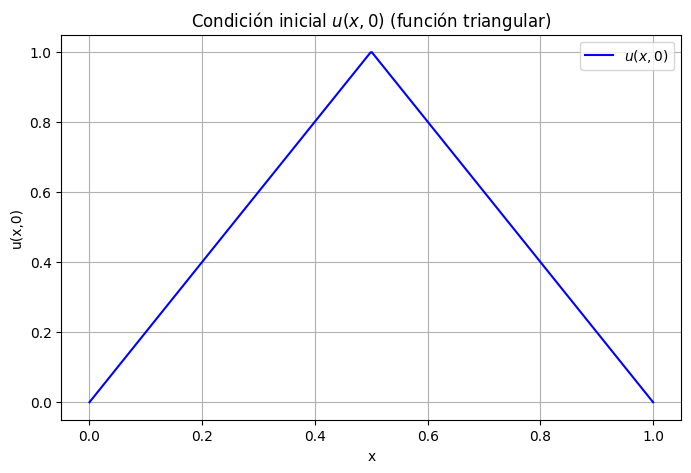

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función triangular por tramos
def f(x):
    return np.where(x < 0.5, 2 * x, 2 * (1 - x))

# Dominio espacial
x_vals = np.linspace(0, 1, 500)
y_vals = f(x_vals)

# Graficamos la condición inicial
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r'$u(x, 0)$', color='blue')
plt.title("Condición inicial $u(x, 0)$ (función triangular)")
plt.xlabel("x")
plt.ylabel("u(x,0)")
plt.grid(True)
plt.legend()
plt.show()


## Cálculo de los coeficientes $ B_n $

Los coeficientes $ B_n $ se obtienen mediante el desarrollo en serie de Fourier:

$
B_n = 2 \int_0^1 f(x) \sin(n\pi x)\,dx
$
donde $f(x) $ es la función triangular definida por tramos:

$
f(x) =
\begin{cases}
2x, & 0 \le x < 0.5 \\\\
2(1 - x), & 0.5 \le x \le 1
\end{cases}
$

Usamos `SymPy` para calcular esta expresión simbólicamente.


Esto muestra que solo para algunos valores impares de $n $, $B_n $será distinto de cero.



In [20]:
from sympy import symbols, sin, pi, integrate, Piecewise, simplify, pprint

# Declaramos variables simbólicas
x, n = symbols('x n', real=True)

# Definimos la función triangular por tramos
f = Piecewise((2 * x, (x >= 0) & (x < 0.5)), (2 * (1 - x), (x >= 0.5) & (x <= 1)))

# Calculamos el coeficiente B_n simbólicamente
Bn = 2 * integrate(f * sin(n * pi * x), (x, 0, 1))

# Simplificamos
Bn_simplificado = simplify(Bn)

# Mostramos el resultado
pprint(Bn_simplificado)


⎧  ⎛     ⎛π⋅n⎞           ⎞                   
⎪4⋅⎜2⋅sin⎜───⎟ - sin(π⋅n)⎟                   
⎪  ⎝     ⎝ 2 ⎠           ⎠                   
⎪─────────────────────────  for n > 0 ∨ n < 0
⎨           2  2                             
⎪          π ⋅n                              
⎪                                            
⎪            0                  otherwise    
⎩                                            


## Solución aproximada $u(x,t) $ mediante serie de Fourier

La solución general de la ecuación de onda es:

$
u(x,t) = \sum_{n=1}^{\infty} B_n \sin(n\pi x)\cos(n\pi t)
$

Donde los coeficientes $B_n $ fueron obtenidos simbólicamente como:

$
B_n = \frac{4}{\pi^2 n^2} \left(2 \sin\left(\frac{n\pi}{2}\right) - \sin(n\pi)\right)
$

A continuación, usamos los primeros 20 términos de la serie para construir una **aproximación de la solución** $ u(x,t) $, y graficamos su evolución para distintos valores de $ t $.


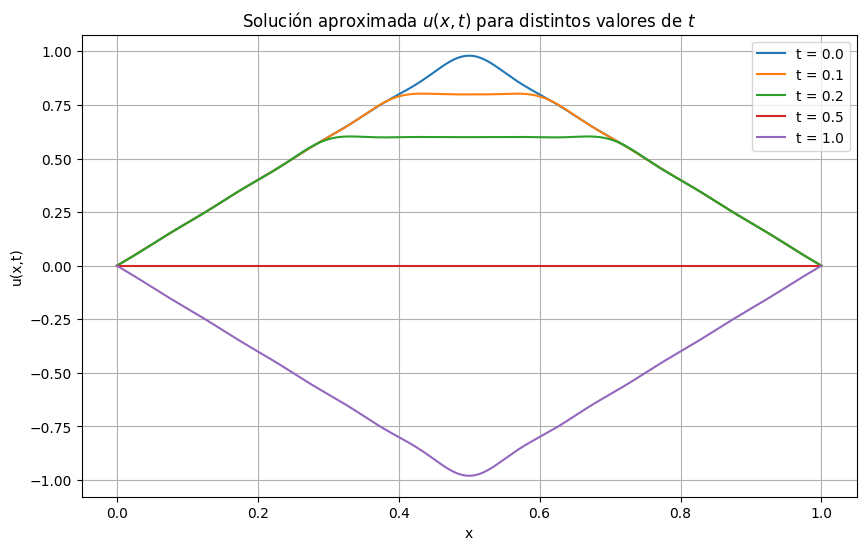

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Número de términos de la serie
N = 20

# Función para calcular B_n
def B_n(n):
    if n == 0:
        return 0
    return (4 / (np.pi**2 * n**2)) * (2 * np.sin(n * np.pi / 2) - np.sin(n * np.pi))

# Función u(x,t) aproximada
def u_aprox(x, t, N=N):
    suma = 0
    for n in range(1, N+1):
        bn = B_n(n)
        suma += bn * np.sin(n * np.pi * x) * np.cos(n * np.pi * t)
    return suma

# Dominio espacial
x_vals = np.linspace(0, 1, 300)

# Tiempos a evaluar
t_vals = [0, 0.1, 0.2, 0.5, 1.0]

# Gráficas para distintos tiempos
plt.figure(figsize=(10, 6))
for t in t_vals:
    y_vals = [u_aprox(x, t) for x in x_vals]
    plt.plot(x_vals, y_vals, label=f't = {t:.1f}')

plt.title("Solución aproximada $u(x,t)$ para distintos valores de $t$")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.grid(True)
plt.legend()
plt.show()


## Animación de la evolución de la solución

En esta sección visualizamos de forma dinámica la evolución temporal de la solución $ u(x,t) $ de la ecuación de onda, iniciando con la función triangular y oscilando a través del tiempo.

La animación permite observar el comportamiento oscilatorio típico de la ecuación de onda con condiciones de frontera fijas.


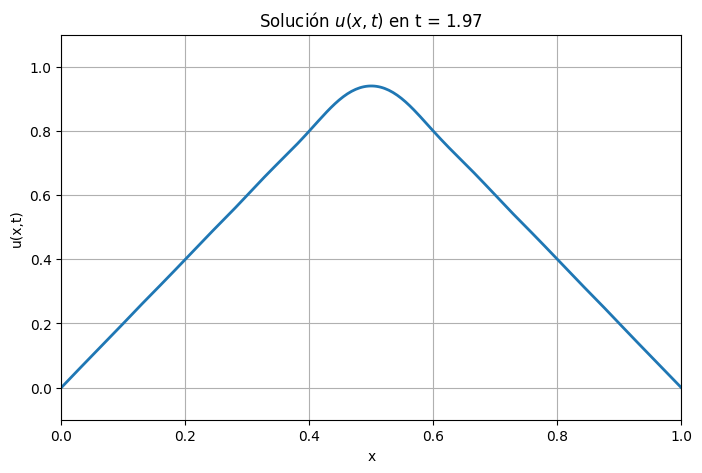

In [22]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Evolución temporal de $u(x,t)$")
ax.grid()

# Datos fijos
x_vals = np.linspace(0, 1, 300)

# Función para inicializar la animación
def init():
    line.set_data([], [])
    return line,

# Función para actualizar cada fotograma
def update(frame):
    t = frame / 30  # tiempo va de 0 a ~2s
    y_vals = [u_aprox(x, t) for x in x_vals]
    line.set_data(x_vals, y_vals)
    ax.set_title(f"Solución $u(x,t)$ en t = {t:.2f}")
    return line,

# Crear animación
anim = FuncAnimation(fig, update, frames=60, init_func=init, blit=True)

# Mostrar animación
from IPython.display import HTML
HTML(anim.to_jshtml())


## Gráfica 3D de la solución $u(x,t) $

Para tener una visión global del comportamiento de la solución en función de la posición y del tiempo, representamos la superficie
$u(x,t) $ en un gráfico tridimensional.

Esto permite observar cómo la forma inicial (triangular) evoluciona oscilando a lo largo del tiempo, respetando las condiciones de frontera y conservando la estructura de la ecuación de onda.


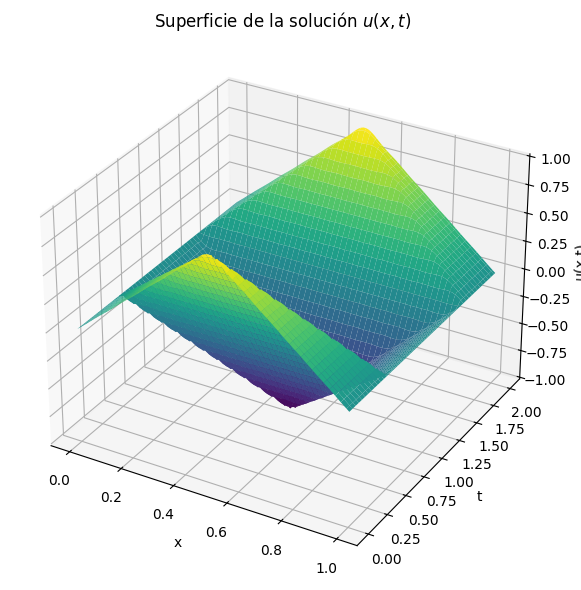

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Dominio espacial y temporal
x_vals = np.linspace(0, 1, 100)
t_vals = np.linspace(0, 2, 100)

# Mallas para x y t
X, T = np.meshgrid(x_vals, t_vals)

# Evaluamos u(x,t) en cada punto del mallado
U = np.array([[u_aprox(x, t) for x in x_vals] for t in t_vals])

# Graficamos en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U, cmap='viridis')

ax.set_title("Superficie de la solución $u(x,t)$")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u(x,t)")
plt.tight_layout()
plt.show()
